In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [10]:
df.dtypes

[('sepal.length', 'double'),
 ('sepal.width', 'double'),
 ('petal.length', 'double'),
 ('petal.width', 'double'),
 ('variety', 'string')]

In [11]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal.length|        sepal.width|      petal.length|       petal.width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [0]:
df = df.withColumnRenamed('sepal.length', 'sl')
df = df.withColumnRenamed('sepal.width', 'sw')
df = df.withColumnRenamed('petal.length', 'pl')
df = df.withColumnRenamed('petal.width', 'pw')

In [0]:
df_max = df.groupBy('variety').max('sl', 'sw', 'pl', 'pw')
df_min = df.groupBy('variety').min('sl', 'sw', 'pl', 'pw')
df_avg = df.groupBy('variety').avg('sl', 'sw', 'pl', 'pw')

In [31]:
df_j = df_max.join(df_min, 'variety', how='inner').join(df_avg, 'variety', how='inner')
df_j.show()

+----------+-------+-------+-------+-------+-------+-------+-------+-------+-----------------+------------------+------------------+------------------+
|   variety|max(sl)|max(sw)|max(pl)|max(pw)|min(sl)|min(sw)|min(pl)|min(pw)|          avg(sl)|           avg(sw)|           avg(pl)|           avg(pw)|
+----------+-------+-------+-------+-------+-------+-------+-------+-------+-----------------+------------------+------------------+------------------+
| Virginica|    7.9|    3.8|    6.9|    2.5|    4.9|    2.2|    4.5|    1.4|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|    5.8|    4.4|    1.9|    0.6|    4.3|    2.3|    1.0|    0.1|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|    7.0|    3.4|    5.1|    1.8|    4.9|    2.0|    3.0|    1.0|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-------+-------+-------+-------+-------+-------+-------+-------+------------

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
sepal_length = df[['sl']].collect()
sepal_width = df[['sw']].collect()
petal_length= df[['pl']].collect()
petal_width= df[['pw']].collect()

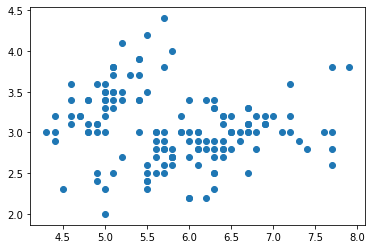

In [34]:
plt.figure()
plt.scatter(sepal_length, sepal_width)
plt.show()

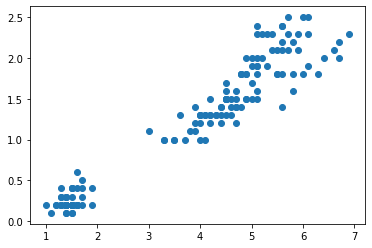

In [35]:
plt.figure()
plt.scatter(petal_length, petal_width)
plt.show()

In [0]:
#Проще всего спрогнозировать Setosa, по графикам видно,
#как хорошо этот класс отделяется от двух других

In [0]:
from pyspark.sql import functions as F

In [0]:
df = df.withColumn("New Class", F.when(
                                    (df["sl"] <= 5.5) &
                                    (df["sw"] >= 3) &
                                    (df["pl"] <= 2)  &
                                    (df["pw"] <= 0.5)
                                    , "Setosa").otherwise("Not Setosa")
                   )

In [0]:
df = df.withColumn("Old Class", F.when((df["variety"] == "Setosa"), "Setosa").otherwise("Not Setosa")
                   
                   )

In [100]:
df.show()

+---+---+---+---+-------+----------+----------+---------+
| sl| sw| pl| pw|variety| New Class|old Setosa|Old Class|
+---+---+---+---+-------+----------+----------+---------+
|5.1|3.5|1.4|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.9|3.0|1.4|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.7|3.2|1.3|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.6|3.1|1.5|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|5.0|3.6|1.4|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|5.4|3.9|1.7|0.4| Setosa|    Setosa|    Setosa|   Setosa|
|4.6|3.4|1.4|0.3| Setosa|    Setosa|    Setosa|   Setosa|
|5.0|3.4|1.5|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.4|2.9|1.4|0.2| Setosa|Not Setosa|    Setosa|   Setosa|
|4.9|3.1|1.5|0.1| Setosa|    Setosa|    Setosa|   Setosa|
|5.4|3.7|1.5|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.8|3.4|1.6|0.2| Setosa|    Setosa|    Setosa|   Setosa|
|4.8|3.0|1.4|0.1| Setosa|    Setosa|    Setosa|   Setosa|
|4.3|3.0|1.1|0.1| Setosa|    Setosa|    Setosa|   Setosa|
|5.8|4.0|1.2|0

In [101]:
#Матрица сопряженности для оценки результата прогноза
df.groupby('New Class').pivot('Old Class').count().show()

+----------+----------+------+
| New Class|Not Setosa|Setosa|
+----------+----------+------+
|Not Setosa|       100|     6|
|    Setosa|      null|    44|
+----------+----------+------+



In [1]:
#Качество всего Setosa = 50 мы угадали 44, тогда Precision
44/ (44+0)

1.0

In [2]:
#Recall
44 / (44+6)

0.88

In [104]:
#При это accuracy
(44+100) / 150

0.96

In [0]:
#Вывод - очень неплохой результат для такого ручного варианта прогноза